# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, you have been tasked to create a model that
predicts Airbnb rental prices for the city of Amsterdam. Popularity for Airbnbs in
Amsterdam has grown over the past years and you are required to build a solution the
would make optimal predictions.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE and R2 scores.

### c) Understanding the Context 

Airbnb is an American vacation rental online marketplace company based in San
Francisco, California, United States. Airbnb offers arrangement for lodging, primarily
homestays, or tourism experiences. The company does not own any of the real estate
listings, nor does it host events; it acts as a broker, receiving commissions from each
booking.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [ ]:
# loading and previewing dataset
# df = pd.read_csv('listing_summary.csv')
df = pd.read_csv('https://bit.ly/31fkomB')
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17096,37099002,Great loft in lovely neighbourhood near Vondelpark,5575489,Annette,NaN,Zuid,52.35586,4.85277,Entire home/apt,180,2,1,2020-02-16,0.48,1,95
750,1316990,W 120 m2 double floor 2 bedr/2bathr Jordaan apt E,5796250,Remco,NaN,Centrum-West,52.38145,4.88490,Entire home/apt,180,7,102,2019-11-28,1.25,11,168
253,582135,Jacky's place,2866493,Jacqueline,NaN,Oud-Noord,52.38723,4.91974,Entire home/apt,100,4,10,2017-09-09,0.29,1,0


In [ ]:
# loading glossary
# glossary = pd.read_csv('Glossary - Sheet1 (1).csv', header = None)
glossary = pd.read_csv('https://bit.ly/3klxdEn', header = None)
glossary.head()

,0
0,room_id: A unique number identifying an Airbnb listing.
1,host_id: A unique number identifying an Airbnb host.
2,neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.
3,"room_type: One of “Entire home/apt”, “Private room”, or “Shared room”."
4,host_response_rate: The rate at which the particular host responds to the customers.


In [ ]:
# dropping the 'name' variable
df.drop(columns = ['name'], inplace = True)

In [ ]:
# checking dataset shape
df.shape

(19362, 15)

In [ ]:
# checking data types
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(19362, 15)

No duplicates found

In [ ]:
# checking for missing data
df.isna().sum()

id                                    0
host_id                               0
host_name                             4
neighbourhood_group               19362
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2284
reviews_per_month                  2284
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# dropping the 'neighbourhood_group' variable, and the records with missing values for 'last_review'
# and 'reviews_per_month'
df.drop(columns = ['neighbourhood_group'], inplace = True)
df.dropna(inplace = True)

# confirming we have no null values
df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.shape

(17075, 14)

In [ ]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print('First Five unique values:',df[col].unique()[:5])
    print()

Variable: id
Number of unique variables: 17075
First Five unique values: [ 2818 20168 25428 27886 28871]

Variable: host_id
Number of unique variables: 15182
First Five unique values: [  3159  59484  56142  97647 124245]

Variable: host_name
Number of unique variables: 5382
First Five unique values: ['Daniel' 'Alexander' 'Joan' 'Flip' 'Edwin']

Variable: neighbourhood
Number of unique variables: 22
First Five unique values: ['Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Centrum-West'
 'Zuid' 'De Pijp - Rivierenbuurt']

Variable: latitude
Number of unique variables: 5720
First Five unique values: [52.36575 52.36509 52.37297 52.38761 52.36719]

Variable: longitude
Number of unique variables: 9193
First Five unique values: [4.94142 4.89354 4.88339 4.89188 4.89092]

Variable: room_type
Number of unique variables: 4
First Five unique values: ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']

Variable: price
Number of unique variables: 422
First Five unique values: [ 5

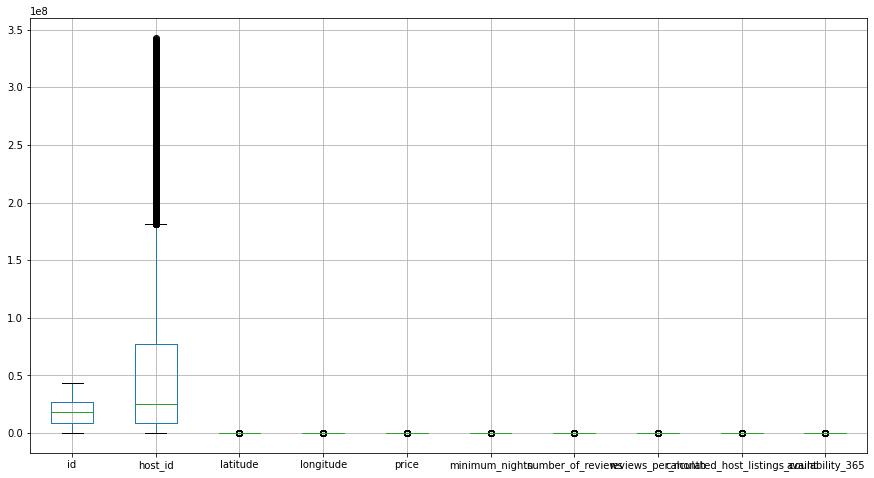

In [ ]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot()
plt.show()

In [ ]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(8544, 14)


,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6878,13758770,7233992,Don,Zuid,52.34420,4.86119,Private room,139,1,35,2020-02-08,0.82,1,364
15041,30492673,228853872,Zoe,Centrum-Oost,52.36898,4.92942,Entire home/apt,100,1,3,2019-12-30,0.19,1,0
6971,13852548,74774069,Rens,Osdorp,52.35413,4.79837,Private room,79,2,137,2020-03-15,2.99,1,148


In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

50.04

It would be tricky to drop the records with outliers since that will reduce our dataset by half so we will leave them there. However, we will drop the host_id variable later on, right before modeling.

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Univariate Analysis 

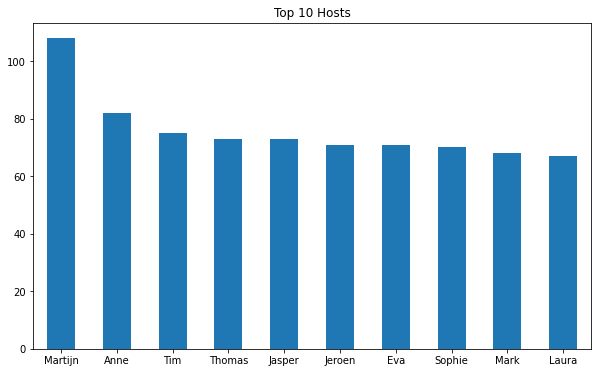

In [ ]:
# getting the top 10 most common hosts
plt.figure(figsize = (10, 6))
df.host_name.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.title("Top 10 Hosts")
plt.show()

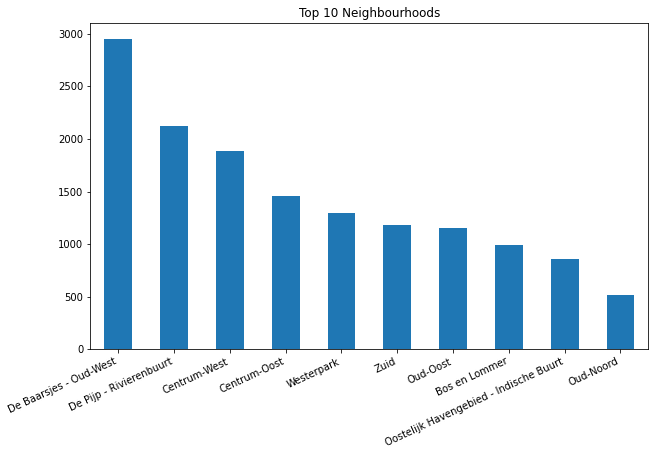

In [ ]:
# getting the top 10 most common neighbourhoods
plt.figure(figsize = (10, 6))
df.neighbourhood.value_counts()[:10].plot(kind = 'bar', rot = 25)
plt.xticks(ha = "right")
plt.title("Top 10 Neighbourhoods")
plt.show()

In [ ]:
df.room_type.value_counts()

Entire home/apt    13308
Private room        3497
Hotel room           232
Shared room           38
Name: room_type, dtype: int64

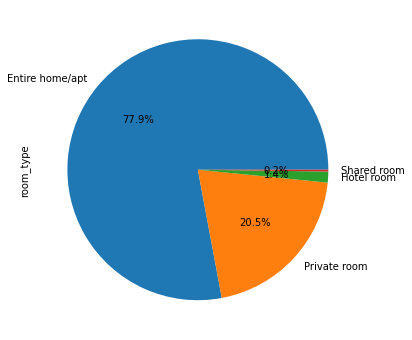

In [ ]:
# getting the most common room types
plt.figure(figsize = (6, 6))
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
df.room_type.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


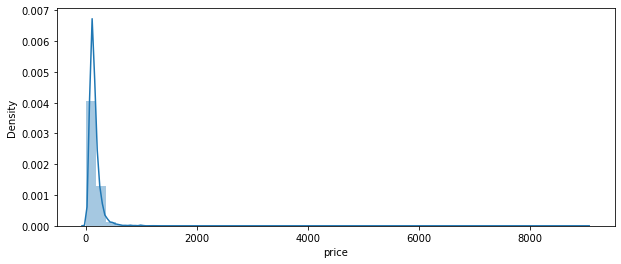

In [ ]:
# distribution of price
plt.figure(figsize = (10,4))
sns.distplot(df['price'])
plt.show()

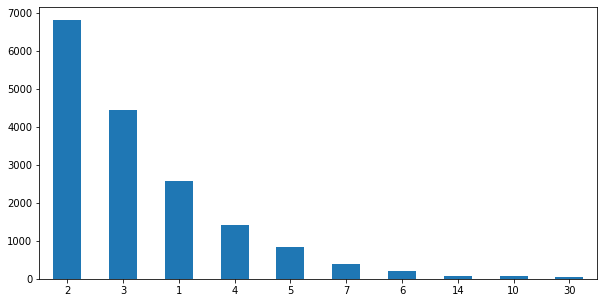

In [ ]:
# getting the top 10 most common minimum number of nights to spend
plt.figure(figsize = (10, 5))
df.minimum_nights.value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

## 3.2 Bivariate Analysis

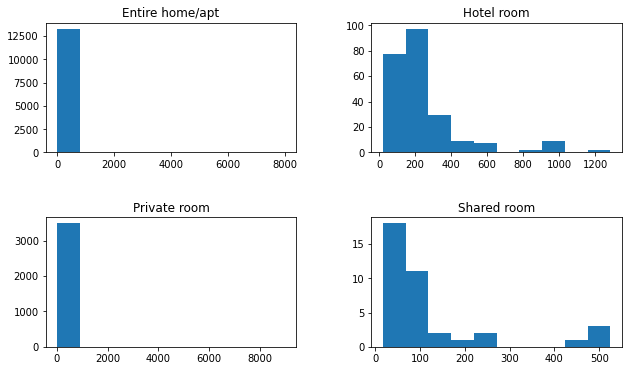

In [ ]:
# price by room type
df.hist('price', by = 'room_type', rot = 0, figsize = (10, 6))
plt.show()

In [ ]:
# average price by neighbourhood
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Centrum-West                              203.653397
Centrum-Oost                              190.534247
Zuid                                      178.813243
Oud-Noord                                 168.763566
De Pijp - Rivierenbuurt                   166.601787
IJburg - Zeeburgereiland                  157.723077
Westerpark                                151.241140
De Baarsjes - Oud-West                    149.376228
Oud-Oost                                  144.606957
Watergraafsmeer                           141.199125
Buitenveldert - Zuidas                    137.690355
Oostelijk Havengebied - Indische Buurt    135.101163
Noord-Oost                                130.495833
Noord-West                                126.318885
Bos en Lommer                             122.525304
De Aker - Nieuw Sloten                    121.268908
Slotervaart                               119.791549
Geuzenveld - Slotermeer                   113.937143
Osdorp                          

In [ ]:
# average price by number of nights
df.groupby('minimum_nights')['price'].mean().sort_values(ascending = False)

minimum_nights
365     3000.000000
200      999.000000
99       999.000000
52       429.000000
30       331.551020
222      300.000000
27       275.000000
48       250.000000
31       243.750000
150      203.000000
21       201.761905
15       197.888889
1000     185.000000
240      180.000000
28       175.900000
7        174.760526
300      170.500000
180      169.250000
3        166.936544
14       163.476923
38       159.000000
4        158.828311
45       157.500000
5        155.676190
1        154.149670
60       152.071429
2        151.557365
24       150.000000
22       150.000000
6        146.276923
59       146.250000
40       139.000000
9        136.250000
41       131.000000
20       130.185185
1001     130.000000
16       129.666667
100      127.000000
90       126.250000
10       125.709677
18       125.000000
8        120.730769
999      120.000000
29       120.000000
25       118.555556
12       118.083333
500      110.000000
50       110.000000
17       109.500000
95   

## 3.3 Feature Engineering

In [ ]:
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210


In [ ]:
# getting the average price per room type
# YOUR CODE HERE
avg_price_per_room = df.groupby('room_type')['price'].mean().to_dict()
# adding to our dataset
# YOUR CODE HERE
df['avg_price_per_room'] = df['room_type'].map(avg_price_per_room)

# previewing our modified dataset
# YOUR CODE HERE
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_room
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172,109.421504
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210,109.421504


In [ ]:
# getting the average price per neighbourhood
# YOUR CODE HERE
avg_price_per_neighbourhood = df.groupby('neighbourhood').price.transform('mean')

# adding to our dataset
# YOUR CODE HERE
df['avg_price_per_neighbourhood'] = avg_price_per_neighbourhood
# previewing our modified dataset
# YOUR CODE HERE
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504,135.101163
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504,190.534247
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967,203.653397
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172,109.421504,203.653397
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210,109.421504,203.653397


In [ ]:
# encoding 'room_type'
# YOUR CODE HERE
# trying nominal encoding
# sort the dictionary of average price per room type based on values
sorted(avg_price_per_room.items(), key=lambda x: x[1])

[('Private room', 109.42150414641121),
 ('Shared room', 123.0),
 ('Entire home/apt', 169.17996693718064),
 ('Hotel room', 245.85344827586206)]

In [ ]:
# assign the numbers based on the average values
room_type_map = {'Private room':1,'Shared room':2,'Entire home/apt':3,'Hotel room':4}
# create a new column in the dataframe
df['room_type_encode'] = df['room_type'].map(room_type_map)
df.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,2818,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169,109.421504,135.101163,1
1,20168,59484,Alexander,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106,109.421504,190.534247,1
2,25428,56142,Joan,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132,169.179967,203.653397,3
3,27886,97647,Flip,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172,109.421504,203.653397,1
4,28871,124245,Edwin,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210,109.421504,203.653397,1


In [ ]:
# dropping unneeded columns in preparation for modeling
# YOUR CODE HERE
df.drop(columns=['id','host_id','host_name','neighbourhood','room_type','last_review'],inplace=True)
print(df.shape)
df.head()

(17075, 11)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,avg_price_per_room,avg_price_per_neighbourhood,room_type_encode
0,52.36575,4.94142,59,3,278,2.06,1,169,109.421504,135.101163,1
1,52.36509,4.89354,100,1,340,2.76,2,106,109.421504,190.534247,1
2,52.37297,4.88339,125,14,5,0.18,1,132,169.179967,203.653397,3
3,52.38761,4.89188,155,2,217,2.15,1,172,109.421504,203.653397,1
4,52.36719,4.89092,75,2,332,2.82,3,210,109.421504,203.653397,1


# <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# split into features (X) and label (Y)
# YOUR CODE HERE
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
# split into 70-30 train and test sets
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('\nX_train',X_train.shape, '\nX_test',X_test.shape, '\ny_train',y_train.shape, '\ny_test',y_test.shape)


X_train (11952, 10) 
X_test (5123, 10) 
y_train (11952,) 
y_test (5123,)


In [ ]:
# scaling our features
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

For purposes of simplicity, we will work with the following regressors:
* Decision Tree Regressor
* Random Forest Regressor

## 4.1 Normal Modeling

In [ ]:
# loading our regressors
# YOUR CODE HERE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import the scoring metrics
from sklearn.metrics import mean_squared_error, r2_score

# instantiating our regressors
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score:', dt_r2)
print('Random Forest R2 Score:', rf_r2)

Decision Tree RMSE: 193.87068593655022
Random Forest RMSE: 146.17761575849624
Decision Tree R2 Score: -0.6805592382419783
Random Forest R2 Score: 0.04458670625603811


In [ ]:
# 10% of target variable's mean
# YOUR CODE HERE
mean_price = y.mean()
mean_price * 0.1

15.788029282576867

Record your observations.

<i><li>Both models give an RMSE that is lower than 10% of the mean price implying lower accuracy</li>
<li> Very low R2 scores also indicates the features do not correlate well with the target variable</li>

## 4.2 Modeling with Grid Search

In [ ]:
# setting our grid parameters
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)

# grid parameters for decision trees
dt_grid_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}
# grid parameters for random forest
rf_grid_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}
# setting up the Grid Search with our regressors with cv = 5 and n_jobs = -1
# YOUR CODE HERE
# decision tree Grid Search
gd_sr_dt = GridSearchCV(estimator = dt_model,
                     param_grid = dt_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# Random forest Grid Search
gd_sr_rf = GridSearchCV(estimator = rf_model,
                     param_grid = rf_grid_param,
                     scoring = ['neg_root_mean_squared_error','r2'],
                     cv = 5,
                     refit = 'neg_root_mean_squared_error',
                     verbose = 2,
                     n_jobs =-1)
# fitting to training data
# YOUR CODE HERE
gd_sr_dt.fit(X_train, y_train)
gd_sr_rf.fit(X_train, y_train)

# getting the best parameters
# YOUR CODE HERE
best_parameters_dt = gd_sr_dt.best_params_
best_parameters_rf = gd_sr_rf.best_params_
print('Decision Tree Best Parameters')
print(best_parameters_dt)
print('Random Forest Best Parameters')
print(best_parameters_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Decision Tree Best Parameters
{'max_depth': 10, 'min_samples_leaf': 40}
Random Forest Best Parameters
{'max_depth': 20, 'min_samples_leaf': 50, 'n_estimators': 20}


In [ ]:
# get the score for decision tree
best_result_dt = gd_sr_dt.best_score_
print(best_result_dt)

-149.18213195934422


<i> The RMSE from decision tree reduced from <b>193.87</b> to <b>149.18</b> after modelling with Grid Search

In [ ]:
# get the score for random forest
best_result_rf = gd_sr_rf.best_score_
print(best_result_rf)

-146.6779535287496


<i> Random forest RMSE increased slightly from <b>146.17</b> to <b>146.67 </b> after using the Grid search tuning

<i>Random Forest still remains our better model

In [ ]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=10, min_samples_leaf=40)
rf_model = RandomForestRegressor(random_state=1,max_depth=20, min_samples_leaf=50, n_estimators=20)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score:', dt_r2)
print('Random Forest R2 Score:', rf_r2)

Decision Tree RMSE: 146.49542307411218
Random Forest RMSE: 143.24425061515487
Decision Tree R2 Score: 0.04042782865722838
Random Forest R2 Score: 0.08254677573287428


<i> Random forest RMSE reduced from <b>146.17</b> to <b>143.24 </b> after using the the best parameters from the Grid search tuning

<i> The RMSE from decision tree reduced from <b>193.87</b> to <b>146.50</b> after using the the best parameters from the Grid search tuning

## 4.3 Modeling with Random Search

In [ ]:
# setting up our parameters and the respective distributions to sample from
# YOUR CODE HERE
from scipy.stats import randint as sp_randint
# grid parameters for decision trees
dt_random_param = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_leaf': sp_randint(1, 50)
}
# grid parameters for random forest
rf_random_param = {
    'max_depth': [10, 20, 30, 40, 50,None],
    "n_estimators": sp_randint(1, 50),
    'min_samples_leaf': sp_randint(1, 50)
}

# setting up Randomized Search for each regressor   with cv = 5
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV 
dt_model = DecisionTreeRegressor(random_state=1)
rf_model = RandomForestRegressor(random_state=1)

random_dt = RandomizedSearchCV(dt_model, 
                               dt_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )
random_rf = RandomizedSearchCV(rf_model,                                
                               rf_random_param, 
                               cv = 5,
                               scoring = ['neg_root_mean_squared_error','r2'],
                               refit = 'neg_root_mean_squared_error',
                               n_jobs=-1,
                               random_state=1
                               )

# fitting to training data
# YOUR CODE HERE
random_dt.fit(X_train, y_train)
random_rf.fit(X_train, y_train)

# getting the best parameters
# YOUR CODE HERE
best_parameters_dt = random_dt.best_params_
print('Decision Tree Best Parameters (Random Search): ',best_parameters_dt)

best_parameters_rf = random_rf.best_params_
print('Random Forest Best Parameters (Random Search): ',best_parameters_rf)

# And lastly obtaining our accuracy
best_result_dt = random_dt.best_score_
print('Decision Tree Accuracy (Random Search): ',best_result_dt)

best_result_rf = random_rf.best_score_
print('Random Forest Accuracy (Random Search): ',best_result_rf)

Decision Tree Best Parameters (Random Search):  {'max_depth': None, 'min_samples_leaf': 44}
Random Forest Best Parameters (Random Search):  {'max_depth': 50, 'min_samples_leaf': 43, 'n_estimators': 29}
Decision Tree Accuracy (Random Search):  -149.84337042764963
Random Forest Accuracy (Random Search):  -146.84397474778598


<i> Random forest RMSE increased from <b>146.17</b> to <b>146.84 </b> after tuning using Random Search

<i> The RMSE from decision tree reduced from <b>193.87</b> to <b>149.84</b> after tuning using Random Search

In [ ]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=None, min_samples_leaf=44)
rf_model = RandomForestRegressor(random_state=1,max_depth=50, min_samples_leaf=43, n_estimators=29)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Random Search:', dt_rmse)
print('Random Forest RMSE after Random Search:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Random Search:', dt_r2)
print('Random Forest R2 Score after Random Search:', rf_r2)

Decision Tree RMSE after Random Search: 147.03419789762938
Random Forest RMSE after Random Search: 143.06554611746398
Decision Tree R2 Score after Random Search: 0.03335669967907906
Random Forest R2 Score after Random Search: 0.0848344870654314


<i> Random forest RMSE reduced from <b>146.17</b> to <b>143.06 </b> after using the the best parameters from the Random search tuning

<i> The RMSE from decision tree reduced from <b>193.87</b> to <b>147.03</b> after using the the best parameters from the Random search tuning

## 4.4 Modeling with Bayesian Optimization

In [ ]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
dt_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5)}
def dt_objective(space): 
    model = DecisionTreeRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best_dt = fmin(fn= dt_objective,                        # the objective function to miminize / the loss function to minimize
            space = dt_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_dt

100%|██████████| 80/80 [00:02<00:00, 36.76it/s, best loss: -149.53870223767646]


{'max_depth': 370.0, 'min_samples_leaf': 0.4978237863008366}

In [ ]:
# importing the hyperopt library and cross_val_score
# YOUR CODE HERE
from hyperopt import hp, fmin, tpe, STATUS_OK

# setting up a space dictionary
# YOUR CODE HERE
rf_space = {'max_depth': hp.quniform('max_depth', 10, 1200, 10), 
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        "n_estimators": hp.choice ('n_estimators', range(10,1200))
        }
def rf_objective(space): 
    model = RandomForestRegressor(max_depth = space['max_depth'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                  n_estimators = space['n_estimators'])
    # print(classifier)
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred=y_pred))
    # We aim to maximize accuracy; in this case we return it as a negative value
    return {'loss': -rmse, 'status': STATUS_OK }

# 3. Running our bayesian optimizer
# ---
#
best_rf = fmin(fn= rf_objective,                        # the objective function to miminize / the loss function to minimize
            space = rf_space,                        # the range of input values to test during optimisation
            algo= tpe.suggest,                    # the search algorithm to use
            max_evals = 80,                       # the no. of iteration to perform
            rstate=np.random.RandomState(42))     # the randomstate for reproducability / to get the same result when we run the code

# printing out our outcome
best_rf

100%|██████████| 80/80 [03:31<00:00,  2.65s/it, best loss: -149.55831718678724]


{'max_depth': 650.0,
 'min_samples_leaf': 0.3302871981893639,
 'n_estimators': 123}

In [ ]:
# implementing this recommendation

# instantiating our regressors with the recommended parameters
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(random_state=1,max_depth=370, min_samples_leaf=0.50)
rf_model = RandomForestRegressor(random_state=1,max_depth=650, min_samples_leaf=0.33, n_estimators=123)

# fitting to our training data
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# making predictions
# YOUR CODE HERE
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# evaluating the RMSE and R2 scores
# YOUR CODE HERE
# calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('Decision Tree RMSE after Bayesian Optimization:', dt_rmse)
print('Random Forest RMSE after Bayesian Optimization:', rf_rmse)

# calculate R2 Score
dt_r2 = r2_score(y_test,dt_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('Decision Tree R2 Score after Bayesian Optimization:', dt_r2)
print('Random Forest R2 Score after Bayesian Optimization:', rf_r2)

Decision Tree RMSE after Bayesian Optimization: 149.55682362293263
Random Forest RMSE after Bayesian Optimization: 149.5587488222559
Decision Tree R2 Score after Bayesian Optimization: -9.670713776532835e-05
Random Forest R2 Score after Bayesian Optimization: -0.0001224551825498299


<i> Random forest RMSE increased from <b>146.17</b> to <b>149.56 </b> after using the the best parameters from the Bayesian Optimization

<i> The RMSE from decision tree reduced from <b>193.87</b> to <b>149.56</b> after using the the best parameters from the Bayesian Optimization

# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

<i> Our best model was Random Forest that was optimized using Random Search with an RMSE of 143.06

# <font color='#2F4F4F'>6. Recommendations</font>

AirBnB can rely on Random Forest model to predict their rental prices

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
<i> Yes, the analytics question was right to address the problem we needed to solve </i>

### b) Did we have the right data?
<i>The data was relevant in coming up with the model that could predict the rental prices</i>

### c) What can be done to improve the solution?
<i> More hyperparameter tuning can be done on the models to improve on the performance. Dimensinaly reduction using PCA can also help</i>